In [27]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [28]:
data_vw = pd.read_csv("vw.csv")
data_vw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


In [29]:
data_vw['Intercepto']= 1
data_vw = data_vw[['Intercepto', 'year','mileage','tax','mpg','engineSize','price']]
print(data_vw.shape)
data_vw.head()

(15157, 7)


,Intercepto,year,mileage,tax,mpg,engineSize,price
0,1,2019,13904,145,49.6,2.0,25000
1,1,2019,4562,145,49.6,2.0,26883
2,1,2019,7414,145,50.4,2.0,20000
3,1,2019,4825,145,32.5,2.0,33492
4,1,2019,6500,150,39.8,1.5,22900


In [30]:
# preparar os dados
Xdata = data_vw[['Intercepto', 'year','mileage','tax','mpg','engineSize']].values
Ydata = data_vw['price'].values

In [31]:
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Ydata, test_size=0.3, random_state=1)

In [32]:
X = X_train
Y = Y_train

In [33]:
# Numero de renglones en matriz X (base de datos de entrenamiento)
X.shape[0]

10609

In [34]:
# Numero de columnas en matriz X (base de datos de entrenamiento)
X.shape[1]

6

In [35]:
# opcion de formato numerico
np.set_printoptions(formatter={'float_kind':'{:,f}'.format})

In [36]:
# Calcular la transpuesta de X
XT_X = np.matmul(np.matrix.transpose(X), X)
XT_X

array([[10,609.000000, 21,401,194.000000, 233,072,420.000000,
        1,193,210.000000, 570,957.800000, 16,961.200000],
       [21,401,194.000000, 43,171,982,552.000000, 469,825,148,996.000000,
        2,407,544,625.000000, 1,151,684,648.600000, 34,215,355.100000],
       [233,072,420.000000, 469,825,148,996.000000,
        9,876,827,808,602.000000, 21,390,578,815.000000,
        13,579,651,181.999996, 383,760,914.600000],
       [1,193,210.000000, 2,407,544,625.000000, 21,390,578,815.000000,
        176,634,550.000000, 59,476,762.000000, 1,996,151.500000],
       [570,957.800000, 1,151,684,648.600000, 13,579,651,181.999996,
        59,476,762.000000, 32,738,157.620000, 894,313.710000],
       [16,961.200000, 34,215,355.100000, 383,760,914.600000,
        1,996,151.500000, 894,313.710000, 29,370.320000]])

In [37]:
# Calcular la inversa de XT_X
XT_X_inv = np.linalg.inv(XT_X)
XT_X_inv

array([[234.232849, -0.116082, -0.000008, 0.000486, 0.000301, 0.026142],
       [-0.116082, 0.000058, 0.000000, -0.000000, -0.000000, -0.000013],
       [-0.000008, 0.000000, 0.000000, 0.000000, -0.000000, -0.000000],
       [0.000486, -0.000000, 0.000000, 0.000000, 0.000000, -0.000001],
       [0.000301, -0.000000, -0.000000, 0.000000, 0.000001, 0.000004],
       [0.026142, -0.000013, -0.000000, -0.000001, 0.000004, 0.000536]])

In [38]:
# Calcular la transpuesta de Y
XT_Y = np.matmul(np.matrix.transpose(X), Y)
XT_Y

array([178,787,650.000000, 360,765,026,860.000000,
       3,030,266,210,110.000000, 22,654,766,005.000000,
       9,057,032,319.599981, 307,851,287.700000])

In [39]:
betas = np.matmul(XT_X_inv, XT_Y)
betas

array([-3,014,834.951091, 1,498.128055, -0.081003, 4.531650, -75.638175,
       9,321.335395])

In [40]:
# calculo de la suma total de cuadrados (TSS Total Sum of Squares)
TSS =np.matmul(np.matrix.transpose(Y), Y) -len(Y) * (Y.mean() ** 2)
TSS

np.float64(643899084866.5171)

In [41]:
# calculo del ESS (Suma de Cuadrados Explicada)

ESS = np.matmul(np.matmul(np.matrix.transpose(betas), np.matrix.transpose(X)), np.matmul(X, betas)) - len(Y) * (Y.mean() ** 2)
ESS

np.float64(485672814928.66455)

In [42]:
# calculo de RSS (Suma de Cuadrados Residuales)

RSS = TSS - ESS
RSS

np.float64(158226269937.85254)

In [44]:
# calculo del coeficiente de determinacion R^2
R2 = 1-(RSS / TSS)
R2

np.float64(0.7542685280090847)

In [45]:
# calculo del R^2 ajustado
R2_Aj = 1 - (RSS / (X.shape[0] - X.shape[1])) / (TSS / (X.shape[0] - 1))
R2_Aj

np.float64(0.7541526497331293)

In [46]:
# Reporte automatizado de la regresion en python
import statsmodels.api as sm
regressor = sm.OLS(Y, X).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     6509.
Date:              jue., 19 jun. 2025   Prob (F-statistic):               0.00
Time:                        19:02:33   Log-Likelihood:            -1.0267e+05
No. Observations:               10609   AIC:                         2.054e+05
Df Residuals:                   10603   BIC:                         2.054e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.015e+06   5.91e+04    -50.993      0.0

In [47]:
# Aplicar el modelo a los datos de prueba
Y_pred = np.matmul(X_test, betas)
Y_pred

array([15,818.921422, 20,337.998962, 14,114.679339, ..., 13,048.907617,
       16,477.740028, 25,371.972593])

In [48]:
# calculo de residuales
residuals = Y_test - Y_pred
residuals

array([181.078578, -2,839.998962, 16,884.320661, ..., -3,558.907617,
       17.259972, 2,617.027407])

array([[<Axes: title={'center': 'residuals'}>]], dtype=object)

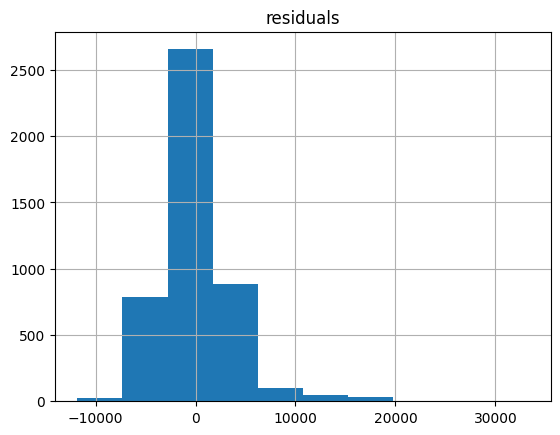

In [50]:
# Graficar histograma de residuales para base de datos de prueba

df = pd.DataFrame(residuals, columns=['residuals'])
df.hist()

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics

print('Coeficiente R cuadrado:', r2_score(Y_test, Y_pred))

Coeficiente R cuadrado: 0.7600191786722389
